<a href="https://colab.research.google.com/github/Yosuke-Sugiura/MachineLearning_Exercise/blob/main/%E5%9B%9E%E5%B8%B0%E3%81%AB%E9%96%A2%E3%81%99%E3%82%8B%E3%82%B3%E3%83%BC%E3%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データ準備

必要データをGoogle Driveにダウンロードして使用する．
ドライブをマウント(連携)するには，左のツーツバーのアイコンから「フォルダ」をクリック，左から３番めの「ドライブをマウント」ボタンをクリックする．

ただし，このコードではGithubにアップロードされているcsvデータをダウンロードする．

In [ ]:
! wget "https://raw.githubusercontent.com/Yosuke-Sugiura/MachineLearning_Exercise/main/data/boston_rm.csv" -O "boston_rm.csv"
! wget "https://raw.githubusercontent.com/Yosuke-Sugiura/MachineLearning_Exercise/main/data/boston.csv" -O "boston.csv"

--2024-07-23 00:32:40--  https://raw.githubusercontent.com/Yosuke-Sugiura/MachineLearning_Exercise/main/data/boston_rm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5856 (5.7K) [text/plain]
Saving to: ‘boston_rm.csv’

boston_rm.csv       100%[===================>]   5.72K  --.-KB/s    in 0s      

2024-07-23 00:32:40 (48.9 MB/s) - ‘boston_rm.csv’ saved [5856/5856]

--2024-07-23 00:32:41--  https://raw.githubusercontent.com/Yosuke-Sugiura/MachineLearning_Exercise/main/data/boston.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

# 線形回帰
---

## 単回帰分析 (特徴量は１つ)

１つの特徴量(`rm`:部屋の広さ)から目的変数(`medv`:住宅価格)を予測する．  
このコードの出力は以下の通り．
1. 予測モデルにおけるパラメータ(重み，傾き)の値
2. R2スコア(1に近いほど良好．)
3. １つ目の図：横軸に`rm`，縦軸に`medv`とした入力と出力の関係をプロットしたもの．
4. ２つ目の図：横軸に`実際の値`，縦軸に`予測した値`をプロットしたもの．y=xの直線にデータが分布すると優れたモデルだと言える．

Coefficients: 
 [9.10210898]
R2 score: 
 0.48352545599133423


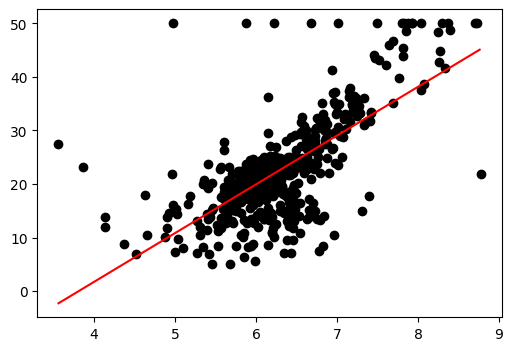

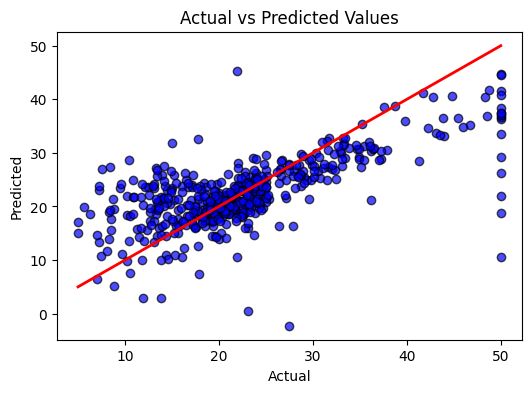

In [ ]:
# モジュール(関数が詰め込まれたツールボックス)をインポートする．
# これで高度な関数が好かえるようになる．
import numpy as np                  # numpyモジュールを読み込んで"np"と名付ける
import matplotlib.pyplot as plt     # matplotlib.pyplotモジュールを読み込んで"plt"と名付ける
from sklearn import linear_model    # sklearnモジュールからlinear_modelを読み込む(名前はそのままlinear_model)
from sklearn.metrics import r2_score

# データの読み込み
# 自身のデータを使うなら...
# 1. csvファイルを作成する．1行目は特徴量のラベルを入れる(boston.csvを参考に)．
# 2. 左ツールバーのフォルダアイコンをクリック
# 3. 作成したcsvファイルをドラッグ&ドロップ
with open("boston_rm.csv", 'r') as file:
    line = file.readline()
    data = np.loadtxt(file, delimiter=',')

# 入力の設定
inputs = data[:,0]                  # 0番目の特徴量を読み込んで inputs とする．
inputs = inputs[:,np.newaxis]       # 単回帰を行う際のおまじない

# 出力の設定
outputs = data[:,-1]                # 最後の列の特徴量を読み込んで outputs とする．

# 回帰分析を行う
regr = linear_model.LinearRegression()  # 回帰分析を行うオブジェクト"regr"を設定する．
regr.fit(inputs, outputs)               # 入力と出力の関係を学習する．

# 予測した値を算出する
predicts = regr.predict(inputs)       # inputsをもとに学習モデルで予測を行う．

# 傾きの値を表示する
print('Coefficients: \n', regr.coef_)

# R2スコア(1に近いほど予測性能が優れる)を算出する
R2 = r2_score(outputs, predicts)
print('R2 score: \n', R2)

# 横軸 rm，縦軸 medv でデータの関係を可視化する．
plt.figure(figsize=(6, 4))
x_min = np.min(inputs)
x_max = np.max(inputs)
plot_x = np.arange(x_min,x_max,0.1)
plot_x = plot_x[:,np.newaxis] # convert [*,*,*,..] -> [[*],[*],[*],...]
plt.scatter(inputs[:,0], outputs,  color='black')
plt.plot(plot_x[:,0], regr.predict(plot_x), color='red')
plt.show()

# 予測値と実測値がどれだけずれているかを図で確認する．
plt.figure(figsize=(6, 4))
plt.plot([outputs.min(), outputs.max()], [outputs.min(), outputs.max()], color='red', lw=2)
plt.scatter(outputs, predicts, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 予測値を保存する．
np.savetxt("predict.csv", predicts, delimiter=",", header='predict')

## 重回帰分析 (特徴量は複数)

複数の特徴量から目的変数(`medv`:住宅価格)を予測する．  
このコードの出力は以下の通り．
1. 予測モデルにおけるパラメータ(重み，傾き)の値
2. R2スコア(1に近いほど良好．)
3. ２つ目の図：横軸に`実際の値`，縦軸に`予測した値`をプロットしたもの．y=xの直線にデータが分布すると優れたモデルだと言える．

残念ながら，入力(複数の特徴量)と出力の関係をプロットすることは難しい．

Coefficients: 
 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
R2 score: 
 0.7406426641094095


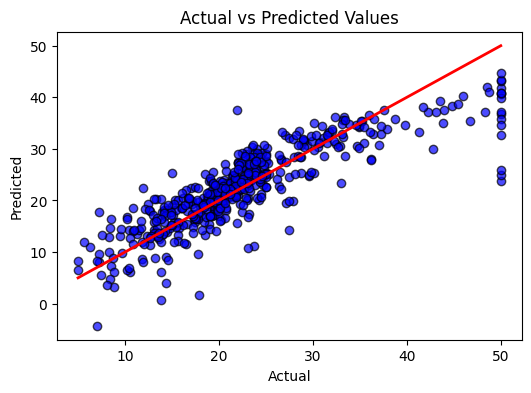

In [ ]:
# モジュール(関数が詰め込まれたツールボックス)をインポートする．
# これで高度な関数が好かえるようになる．
import numpy as np                  # numpyモジュールを読み込んで"np"と名付ける
import matplotlib.pyplot as plt     # matplotlib.pyplotモジュールを読み込んで"plt"と名付ける
from sklearn import linear_model    # sklearnモジュールからlinear_modelを読み込む(名前はそのままlinear_model)
from sklearn.metrics import r2_score

# データの読み込み
# 自身のデータを使うなら...
# 1. csvファイルを作成する．1行目は特徴量のラベルを入れる(boston.csvを参考に)．
# 2. 左ツールバーのフォルダアイコンをクリック
# 3. 作成したcsvファイルをドラッグ&ドロップ
with open("boston.csv", 'r') as file:
    line = file.readline()
    data = np.loadtxt(file, delimiter=',')

# 入力の設定
inputs = data[:,:-1]                # 最後の列以外の列を inputs に設定する．

# 出力の設定
outputs = data[:,-1]                # 最後の列の特徴量を読み込んで outputs とする．

# 回帰分析を行う
regr = linear_model.LinearRegression()  # 回帰分析を行うオブジェクト"regr"を設定する．
regr.fit(inputs, outputs)               # 入力と出力の関係を学習する．

# 予測した値を算出する
predicts = regr.predict(inputs)     # inputsをもとに学習モデルで予測を行う．

# 傾きの値を表示する
print('Coefficients: \n', regr.coef_)

# R2スコア(1に近いほど予測性能が優れる)を算出する
R2 = r2_score(outputs, predicts)
print('R2 score: \n', R2)           # R2スコアを表示する

# 予測値と実測値がどれだけずれているかを図で確認する．
plt.figure(figsize=(6, 4))
plt.plot([outputs.min(), outputs.max()], [outputs.min(), outputs.max()], color='red', lw=2)
plt.scatter(outputs, predicts, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 予測値を保存する．
np.savetxt("predict.csv", predicts, delimiter=",", header='predict')

---
# 一般線形回帰

データに偏りがある場合に，その**偏りを補正するような関数をデータに施す**ことで予測精度が向上する．

まずは通常の線形回帰をやってみる．
１つの特徴量(`lstat`:低所得者の割合)から目的変数(`medv`:住宅価格)を予測する．  
このコードの出力は以下の通り．
1. 予測モデルにおけるパラメータ(重み，傾き)の値
2. R2スコア(1に近いほど良好．)
3. １つ目の図：横軸に`rm`，縦軸に`medv`とした入力と出力の関係をプロットしたもの．
4. ２つ目の図：横軸に`実際の値`，縦軸に`予測した値`をプロットしたもの．y=xの直線にデータが分布すると優れたモデルだと言える．

Coefficients: 
 [-0.95004935]
R2 score: 
 0.5441462975864797


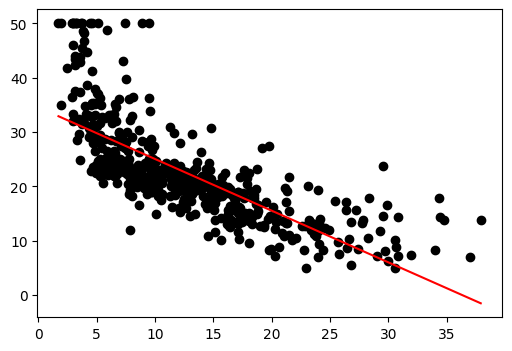

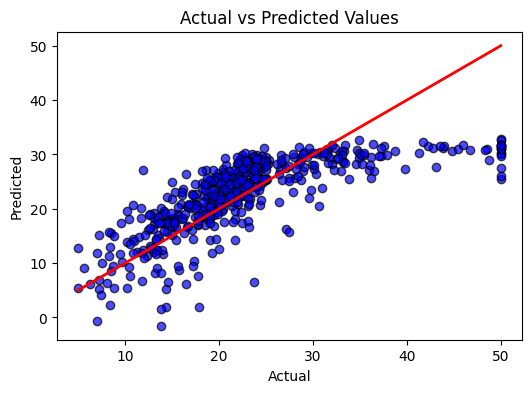

In [ ]:
# モジュール(関数が詰め込まれたツールボックス)をインポートする．
# これで高度な関数が好かえるようになる．
import numpy as np                  # numpyモジュールを読み込んで"np"と名付ける
import matplotlib.pyplot as plt     # matplotlib.pyplotモジュールを読み込んで"plt"と名付ける
from sklearn import linear_model    # sklearnモジュールからlinear_modelを読み込む(名前はそのままlinear_model)
from sklearn.metrics import r2_score

# データの読み込み
# 自身のデータを使うなら...
# 1. csvファイルを作成する．1行目は特徴量のラベルを入れる(boston.csvを参考に)．
# 2. 左ツールバーのフォルダアイコンをクリック
# 3. 作成したcsvファイルをドラッグ&ドロップ
with open("boston.csv", 'r') as file:
    line = file.readline()
    data = np.loadtxt(file, delimiter=',')

# 入力の設定
inputs = data[:,12]                  # 12番目の特徴量を読み込んで inputs とする．
inputs = inputs[:,np.newaxis]       # 単回帰を行う際のおまじない

# 出力の設定
outputs = data[:,-1]                # 最後の列の特徴量を読み込んで outputs とする．

# 回帰分析を行う
regr = linear_model.LinearRegression()  # 回帰分析を行うオブジェクト"regr"を設定する．
regr.fit(inputs, outputs)               # 入力と出力の関係を学習する．

# 予測した値を算出する
predicts = regr.predict(inputs)       # inputsをもとに学習モデルで予測を行う．

# 傾きの値を表示する
print('Coefficients: \n', regr.coef_)

# R2スコア(1に近いほど予測性能が優れる)を算出する
R2 = r2_score(outputs, predicts)
print('R2 score: \n', R2)

# 横軸 rm，縦軸 medv でデータの関係を可視化する．
plt.figure(figsize=(6, 4))
x_min = np.min(inputs)
x_max = np.max(inputs)
plot_x = np.arange(x_min,x_max,0.1)
plot_x = plot_x[:,np.newaxis] # convert [*,*,*,..] -> [[*],[*],[*],...]
plt.scatter(inputs[:,0], outputs,  color='black')
plt.plot(plot_x[:,0], regr.predict(plot_x), color='red')
plt.show()

# 予測値と実測値がどれだけずれているかを図で確認する．
plt.figure(figsize=(6, 4))
plt.plot([outputs.min(), outputs.max()], [outputs.min(), outputs.max()], color='red', lw=2)
plt.scatter(outputs, predicts, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 予測値を保存する．
np.savetxt("predict.csv", predicts, delimiter=",", header='predict')

上の入力と出力の関係を見ると，指数関数 e^(-x) に従う形になっている．なので，目的変数に対数関数(指数関数のリンク関数)を施してデータを補正して線形回帰を行う．ただし，モデルの予測値は(目的変数に対数をとったもの)になるため，予測値に 指数関数をかけて元の(目的変数)の値にもどす．

Coefficients: 
 [-0.04608043]
R2 score: 
 0.6033476561997181


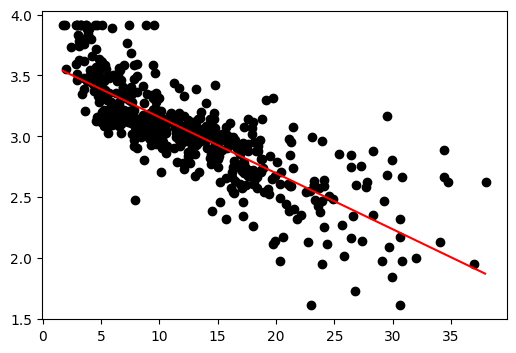

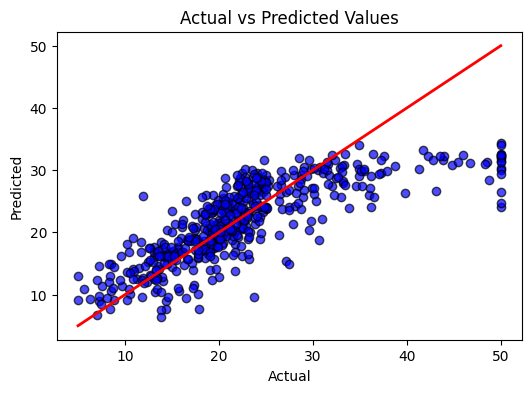

In [ ]:
# モジュール(関数が詰め込まれたツールボックス)をインポートする．
# これで高度な関数が好かえるようになる．
import numpy as np                  # numpyモジュールを読み込んで"np"と名付ける
import matplotlib.pyplot as plt     # matplotlib.pyplotモジュールを読み込んで"plt"と名付ける
from sklearn import linear_model    # sklearnモジュールからlinear_modelを読み込む(名前はそのままlinear_model)
from sklearn.metrics import r2_score

# データの読み込み
# 自身のデータを使うなら...
# 1. csvファイルを作成する．1行目は特徴量のラベルを入れる(boston.csvを参考に)．
# 2. 左ツールバーのフォルダアイコンをクリック
# 3. 作成したcsvファイルをドラッグ&ドロップ
with open("boston.csv", 'r') as file:
    line = file.readline()
    data = np.loadtxt(file, delimiter=',')

# 入力の設定
inputs = data[:,12]                  # 0番目の特徴量を読み込んで inputs とする．
inputs = inputs[:,np.newaxis]       # 単回帰を行う際のおまじない

# 出力の設定
outputs = data[:,-1]                # 最後の列の特徴量を読み込んで outputs とする．

#---------------------------
# 出力が負の指数を逆さにしたような形状．
# 出力に対数のリンク関数(逆関数)である対数関数を施す．
outputs_glm = np.log(outputs)
#---------------------------

# 回帰分析を行う
regr = linear_model.LinearRegression()  # 回帰分析を行うオブジェクト"regr"を設定する．
regr.fit(inputs, outputs_glm)               # 入力と出力の関係を学習する．

# 予測した値を算出する
predicts = regr.predict(inputs)       # inputsをもとに学習モデルで予測を行う．

#---------------------------
# 出力に指数関数をかけてもとにもどす
predicts = np.exp(predicts)
#---------------------------


# 傾きの値を表示する
print('Coefficients: \n', regr.coef_)

# R2スコア(1に近いほど予測性能が優れる)を算出する
R2 = r2_score(outputs, predicts)
print('R2 score: \n', R2)

# 横軸 rm，縦軸 medv でデータの関係を可視化する．
plt.figure(figsize=(6, 4))
x_min = np.min(inputs)
x_max = np.max(inputs)
plot_x = np.arange(x_min,x_max,0.1)
plot_x = plot_x[:,np.newaxis] # convert [*,*,*,..] -> [[*],[*],[*],...]
plt.scatter(inputs[:,0], outputs_glm,  color='black')
plt.plot(plot_x[:,0], regr.predict(plot_x), color='red')
plt.show()

# 予測値と実測値がどれだけずれているかを図で確認する．
plt.figure(figsize=(6, 4))
plt.plot([outputs.min(), outputs.max()], [outputs.min(), outputs.max()], color='red', lw=2)
plt.scatter(outputs, predicts, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 予測値を保存する．
np.savetxt("predict.csv", predicts, delimiter=",", header='predict')

---
# データ整形

データの`medv`の値を見ると，**最大値が50**となっている．これはデータを計測する際，`medv`の値に50以上の数値があったとしてもそれを50に丸めた結果だと考えられる．

このようなデータは予測・分類に悪影響を与える可能性がある．**異常値**を削除して予測精度を上げよう．

異常値を除去したデータがないので，自身で作成する．まずはboston.csvデータをダウンロードし，Excel等で開いてから`medv`=50となる行を削除する．
そのデータを`boston_cleaning.csv`として保存する．このファイルをアップロードして読み込む．


## 異常値を除去した後の重回帰分析

In [ ]:
# モジュール(関数が詰め込まれたツールボックス)をインポートする．
# これで高度な関数が好かえるようになる．
import numpy as np                  # numpyモジュールを読み込んで"np"と名付ける
import matplotlib.pyplot as plt     # matplotlib.pyplotモジュールを読み込んで"plt"と名付ける
from sklearn import linear_model    # sklearnモジュールからlinear_modelを読み込む(名前はそのままlinear_model)
from sklearn.metrics import r2_score

# データの読み込み
# 自身のデータを使うなら...
# 1. csvファイルを作成する．1行目は特徴量のラベルを入れる(boston.csvを参考に)．
# 2. 左ツールバーのフォルダアイコンをクリック
# 3. 作成したcsvファイルをドラッグ&ドロップ
with open("boston.csv", 'r') as file:
    line = file.readline()
    data = np.loadtxt(file, delimiter=',')

# 入力の設定
inputs = data[:,:-1]                # 最後の列以外の列を inputs に設定する．

# 出力の設定
outputs = data[:,-1]                # 最後の列の特徴量を読み込んで outputs とする．

# 回帰分析を行う
regr = linear_model.LinearRegression()  # 回帰分析を行うオブジェクト"regr"を設定する．
regr.fit(inputs, outputs)               # 入力と出力の関係を学習する．

# 予測した値を算出する
predicts = regr.predict(inputs)     # inputsをもとに学習モデルで予測を行う．

# 傾きの値を表示する
print('Coefficients: \n', regr.coef_)

# R2スコア(1に近いほど予測性能が優れる)を算出する
R2 = r2_score(outputs, predicts)
print('R2 score: \n', R2)           # R2スコアを表示する

# 予測値と実測値がどれだけずれているかを図で確認する．
plt.figure(figsize=(6, 4))
plt.plot([outputs.min(), outputs.max()], [outputs.min(), outputs.max()], color='red', lw=2)
plt.scatter(outputs, predicts, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 予測値を保存する．
np.savetxt("predict.csv", predicts, delimiter=",", header='predict')

---
# 多項式回帰

２次の多項式回帰を実装してみよう．まず，「+コード」からコードセルを作成する．次に重回帰分析のコードを`Ctl+C`でコピー，コードセルに`Ctl+V`で貼り付ける．

次に，多項式回帰用のデータを作成する．boston.csvに，1~13列目を二乗した列を追加する．ただし，目的変数である`medv`は二乗せず，また最後の列には`medv`がくるよう，列の順番を調整すること．

データを作成できたらアップロードしてコードを実行する．